In [1]:
import numpy as np
from keras import models
from keras import layers
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import random
from tensorflow.keras.models import load_model
tf.compat.v1.enable_eager_execution()
import seaborn as sns
sns.set_theme()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def delays_entrenamiento(radio, paso):
  total_samples = int(((2*radio)/paso)**2)  
  
  M1 = np.array([-3.5,  3.5, 0]) # así es mejor para introducir las posiciones de 
  M2 = np.array([-3.5, -3.5, 0]) # los MIC´s si no están en un cuadrado
  M3 = np.array([ 3.5,  3.5, 0])
  M4 = np.array([ 3.5, -3.5, 0])

  #Otros Parámetros
  v= 350.0 # velocidad del sonido
  fs = 44100.0 # frecuencia de muestreo de las grabaciones
  error = 2/fs
  Z_min =0.5
  Data = np.zeros([total_samples,6]) # delays para 4 MIC´s
  XYZ = np.zeros([total_samples,3]) # posiciones
  s=0
  for i in range(0, int(np.sqrt(total_samples))): # esta es otra forma, Gabo construye para 
      for j in range(0, int(np.sqrt(total_samples))): # recorrer equiespaciado una grilla
          for k in range(1,2): # alto del árbol
              x=-radio + paso*i 
              y=-radio + paso*j  #pasos en la grilla de 2
              z=Z_min*k
                        
              r1=math.sqrt((x-M1[0])**2+(y-M1[1])**2+(z-M1[2])**2)
              r2=math.sqrt((x-M2[0])**2+(y-M2[1])**2+(z-M2[2])**2)
              r3=math.sqrt((x-M3[0])**2+(y-M3[1])**2+(z-M3[2])**2)
              r4=math.sqrt((x-M4[0])**2+(y-M4[1])**2+(z-M4[2])**2) # distancias a cada MIC
                              
              delta12=(1/v)*(r1-r2)+(error)*random.uniform(0,1)
              delta13=(1/v)*(r1-r3)+(error)*random.uniform(0,1)
              delta14=(1/v)*(r1-r4)+(error)*random.uniform(0,1)
              delta23=(1/v)*(r2-r3)+(error)*random.uniform(0,1)
              delta24=(1/v)*(r2-r4)+(error)*random.uniform(0,1)
              delta34=(1/v)*(r3-r4)+(error)*random.uniform(0,1) # diferencias de tiempo, + un error en la cuantificacion
              Data[s,0]=delta12; Data[s,1]=delta13; Data[s,2]=delta14;
              Data[s,3]=delta23; Data[s,4]=delta24
              Data[s,5]=delta34
              XYZ[s,0]=x; XYZ[s,1]=y; XYZ[s,2]=z
              s=s+1
  return Data, XYZ, total_samples 

In [4]:
Data1, XYZ1, total_samples1= delays_entrenamiento(18,.7)
np.savetxt('/content/drive/MyDrive/RedGabo_Felipe & Constanza/Data1.txt',Data1,fmt = '%10.6f') #/content/drive/My Drive/XYZ.txt
np.savetxt('/content/drive/MyDrive/RedGabo_Felipe & Constanza/XYZ1.txt',XYZ1,fmt = '%10.5f') #/content/drive/My Drive/XYZ.txt


In [5]:
model_1 = load_model('/content/drive/MyDrive/LABO 6 y 7/Experimentos_60m/red_20_04_1200ep_random_decimalextra_r.h5')
model_2 = load_model('/content/drive/MyDrive/LABO 6 y 7/Experimentos_60m/red_20_05_1200ep_random_decimalextra_r.h5')
model_3 = load_model('/content/drive/MyDrive/LABO 6 y 7/Experimentos_60m/red_20_05_1500ep_random_decimalextra_r.h5')
model_4 = load_model('/content/drive/MyDrive/LABO 6 y 7/Experimentos_60m/red_20_05_1800ep_random_decimalextra_r.h5')
model_5=  load_model('/content/drive/MyDrive/LABO 6 y 7/Experimentos_60m/20_arquitectura/red2random_20_128_r.h5')

In [6]:
error_data1=np.loadtxt('/content/drive/MyDrive/RedGabo_Felipe & Constanza/Data1.txt')
error_targets1=np.loadtxt('/content/drive/MyDrive/RedGabo_Felipe & Constanza/XYZ1.txt')

error_xyz_1= model_1.predict(error_data1)
error_xyz_2= model_2.predict(error_data1)
error_xyz_3= model_3.predict(error_data1)
error_xyz_4= model_4.predict(error_data1)
error_xyz_5= model_5.predict(error_data1)

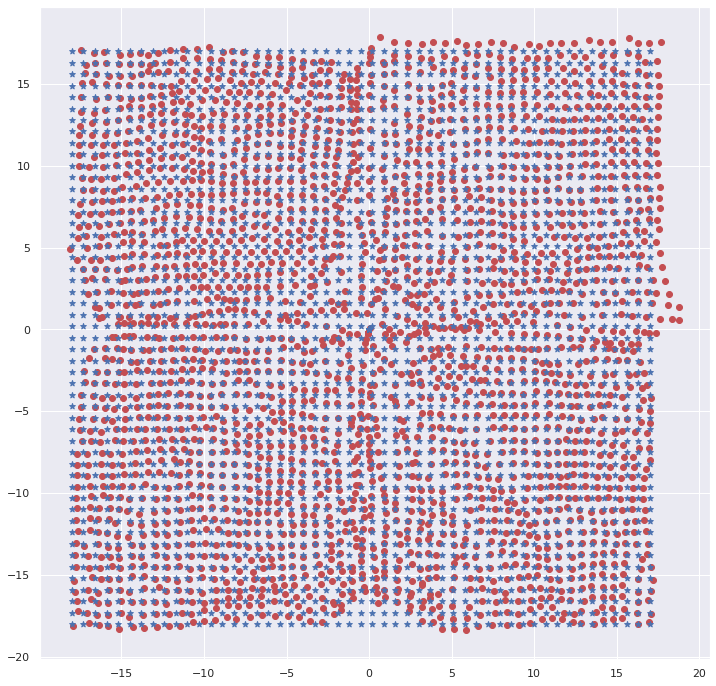

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

#ax.set_xlim(-25,-12)
#ax.set_ylim(-25,-5)
#ax.set_zlim3d(0,1)
ax.scatter(error_xyz_1[:,0],error_xyz_1[:,1], c='r', marker='o')
ax.scatter(error_targets1[:,0],error_targets1[:,1], c='b', marker='*')

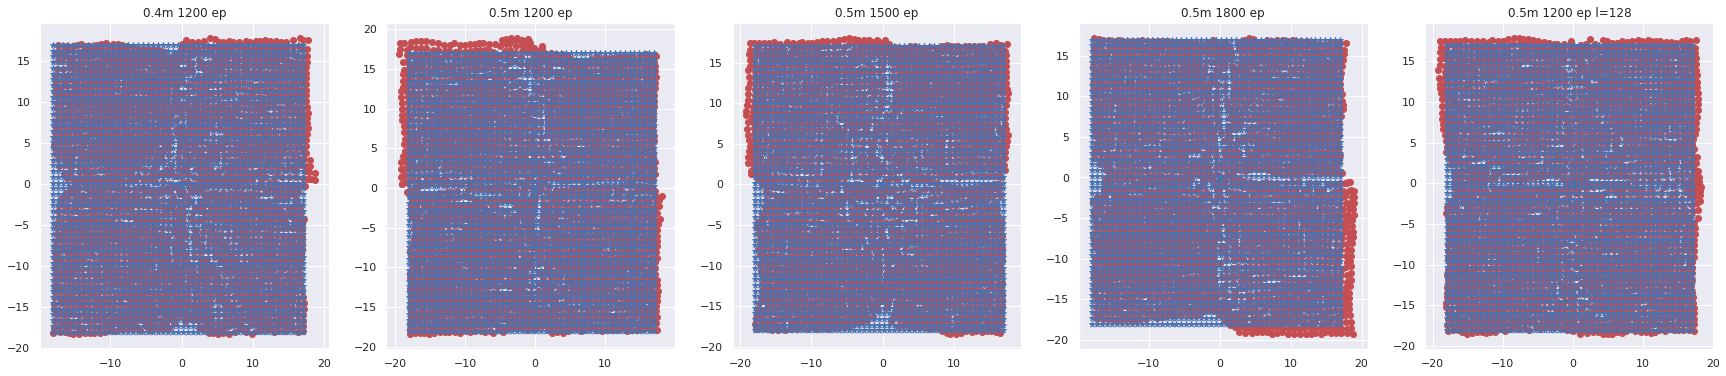

In [8]:
fig, axs = plt.subplots(1, 5, figsize=(30, 6))


axs[0].scatter(error_xyz_1[:,0],error_xyz_1[:,1], c='r', marker='o')
axs[0].scatter(error_targets1[:,0],error_targets1[:,1], c='b', marker='*')
axs[0].set_title('0.4m 1200 ep')

axs[1].scatter(error_xyz_2[:,0],error_xyz_2[:,1], c='r', marker='o')
axs[1].scatter(error_targets1[:,0],error_targets1[:,1], c='b', marker='*')
axs[1].set_title('0.5m 1200 ep')

axs[2].scatter(error_xyz_3[:,0],error_xyz_3[:,1], c='r', marker='o')
axs[2].scatter(error_targets1[:,0],error_targets1[:,1], c='b', marker='*')
axs[2].set_title('0.5m 1500 ep')

axs[3].scatter(error_xyz_4[:,0],error_xyz_4[:,1], c='r', marker='o')
axs[3].scatter(error_targets1[:,0],error_targets1[:,1], c='b', marker='*')
axs[3].set_title('0.5m 1800 ep')

axs[4].scatter(error_xyz_5[:,0],error_xyz_5[:,1], c='r', marker='o')
axs[4].scatter(error_targets1[:,0],error_targets1[:,1], c='b', marker='*')
axs[4].set_title('0.5m 1200 ep l=128')

#fig.tight_layout()
plt.show()

In [9]:
x1,y1 = np.meshgrid(error_targets1[:,0], error_targets1[:,1], indexing="ij")

#for i in range(len(x)):
 #   for j in range(len(x)):
  #      print(x[i,j], y[i,j])  # estas son las posciones de la grilla
                             # por tanto son las posiciones a las que hay que obtener los
                             #delays para estimar la posición
        

#coord = np.arange(-5+0.1, 0+0.1,1)
x,y = np.meshgrid(error_xyz_1[:,0], error_xyz_1[:,1], indexing="ij")
# aquí solo estoy creando posiciones "predichas"

#plt.figure()        
#plt.plot(x,y, marker='.', color='k', linestyle='none')
#plt.plot(x1,y1, marker='*', color='r', linestyle='none')
#plt.xlim(np.min(x-1),np.max(x+1))
#plt.ylim(np.min(y-1),np.max(y+1))

Error1=np.zeros((len(x),len(x)))
for i in range(len(x)):
    for j in range(len(x)):
     
      xe=(x1[i,j]-x[i,j])
      ye=(y1[i,j]-y[i,j])
      Error1[i,j]= np.sqrt((xe)**2 + (ye)**2)



error_medio=np.mean(Error1)
error_m= Error1 > error_medio
A=len(Error1[error_m])
B=(A*100)/(len(Error1)**2)
error_m2=Error1 > 1
C=len(Error1[error_m2])
D=(C*100)/(len(Error1)**2)
error_medio1=error_medio
print('----------------------')
print('El error medio es')
print(error_medio)
print('El porcentaje de valores mayores a la media es')
print(B)
print('----------------------')
print('El porcentaje de valores mayores 1m')
print(D)

----------------------
El error medio es
0.39397725322561644
El porcentaje de valores mayores a la media es
41.06882308243367
----------------------
El porcentaje de valores mayores 1m
3.119743042792633


In [10]:
x1,y1 = np.meshgrid(error_targets1[:,0], error_targets1[:,1], indexing="ij")

#for i in range(len(x)):
 #   for j in range(len(x)):
  #      print(x[i,j], y[i,j])  # estas son las posciones de la grilla
                             # por tanto son las posiciones a las que hay que obtener los
                             #delays para estimar la posición
        

#coord = np.arange(-5+0.1, 0+0.1,1)
x,y = np.meshgrid(error_xyz_2[:,0], error_xyz_2[:,1], indexing="ij")
# aquí solo estoy creando posiciones "predichas"

#plt.figure()        
#plt.plot(x,y, marker='.', color='k', linestyle='none')
#plt.plot(x1,y1, marker='*', color='r', linestyle='none')
#plt.xlim(np.min(x-1),np.max(x+1))
#plt.ylim(np.min(y-1),np.max(y+1))

Error2=np.zeros((len(x),len(x)))
for i in range(len(x)):
    for j in range(len(x)):
     
      xe=(x1[i,j]-x[i,j])
      ye=(y1[i,j]-y[i,j])
      Error2[i,j]= np.sqrt((xe)**2 + (ye)**2)

print(np.mean(Error2))
print(np.max(Error2))
print(np.min(Error2))

error_medio=np.mean(Error2)
error_m= Error2 > error_medio
A=len(Error2[error_m])
B=(A*100)/(len(Error2)**2)
error_m2=Error2 > 1
C=len(Error2[error_m2])
D=(C*100)/(len(Error2)**2)
error_medio2=error_medio
print('----------------------')
print('El error medio es')
print(error_medio)
print('El porcentaje de valores mayores a la media es')
print(B)
print('----------------------')
print('El porcentaje de valores mayores 1m')
print(D)

0.5090481843092554
4.681632411035625
0.00016386608846092352
----------------------
El error medio es
0.5090481843092554
El porcentaje de valores mayores a la media es
33.65751474522854
----------------------
El porcentaje de valores mayores 1m
9.884495709750732


In [11]:
x1,y1 = np.meshgrid(error_targets1[:,0], error_targets1[:,1], indexing="ij")

#for i in range(len(x)):
 #   for j in range(len(x)):
  #      print(x[i,j], y[i,j])  # estas son las posciones de la grilla
                             # por tanto son las posiciones a las que hay que obtener los
                             #delays para estimar la posición
        

#coord = np.arange(-5+0.1, 0+0.1,1)
x,y = np.meshgrid(error_xyz_3[:,0], error_xyz_3[:,1], indexing="ij")
# aquí solo estoy creando posiciones "predichas"

#plt.figure()        
#plt.plot(x,y, marker='.', color='k', linestyle='none')
#plt.plot(x1,y1, marker='*', color='r', linestyle='none')
#plt.xlim(np.min(x-1),np.max(x+1))
#plt.ylim(np.min(y-1),np.max(y+1))

Error3=np.zeros((len(x),len(x)))
for i in range(len(x)):
    for j in range(len(x)):
     
      xe=(x1[i,j]-x[i,j])
      ye=(y1[i,j]-y[i,j])
      Error3[i,j]= np.sqrt((xe)**2 + (ye)**2)

print(np.mean(Error3))
print(np.max(Error3))
print(np.min(Error3))

error_medio=np.mean(Error3)
error_m= Error3 > error_medio
A=len(Error3[error_m])
B=(A*100)/(len(Error3)**2)
error_m2=Error3 > 1
C=len(Error3[error_m2])
D=(C*100)/(len(Error3)**2)
error_medio3=error_medio
print('----------------------')
print('El error medio es')
print(error_medio)
print('El porcentaje de valores mayores a la media es')
print(B)
print('----------------------')
print('El porcentaje de valores mayores 1m')
print(D)

0.5670526714032328
4.582074420080975
0.00015087429096684465
----------------------
El error medio es
0.5670526714032328
El porcentaje de valores mayores a la media es
39.038478924107565
----------------------
El porcentaje de valores mayores 1m
10.365289148381516


In [12]:
x1,y1 = np.meshgrid(error_targets1[:,0], error_targets1[:,1], indexing="ij")

#for i in range(len(x)):
 #   for j in range(len(x)):
  #      print(x[i,j], y[i,j])  # estas son las posciones de la grilla
                             # por tanto son las posiciones a las que hay que obtener los
                             #delays para estimar la posición
        

#coord = np.arange(-5+0.1, 0+0.1,1)
x,y = np.meshgrid(error_xyz_4[:,0], error_xyz_4[:,1], indexing="ij")
# aquí solo estoy creando posiciones "predichas"

#plt.figure()        
#plt.plot(x,y, marker='.', color='k', linestyle='none')
#plt.plot(x1,y1, marker='*', color='r', linestyle='none')
#plt.xlim(np.min(x-1),np.max(x+1))
#plt.ylim(np.min(y-1),np.max(y+1))

Error4=np.zeros((len(x),len(x)))
for i in range(len(x)):
    for j in range(len(x)):
     
      xe=(x1[i,j]-x[i,j])
      ye=(y1[i,j]-y[i,j])
      Error4[i,j]= np.sqrt((xe)**2 + (ye)**2)

print(np.mean(Error4))
print(np.max(Error4))
print(np.min(Error4))

error_medio=np.mean(Error4)
error_m= Error4 > error_medio
A=len(Error4[error_m])
B=(A*100)/(len(Error4)**2)
error_m2=Error4 > 1
C=len(Error4[error_m2])
D=(C*100)/(len(Error4)**2)
error_medio4=error_medio
print('----------------------')
print('El error medio es')
print(error_medio)
print('El porcentaje de valores mayores a la media es')
print(B)
print('----------------------')
print('El porcentaje de valores mayores 1m')
print(D)

0.6993853654924901
4.052701348601128
0.00020122024114026748
----------------------
El error medio es
0.6993853654924901
El porcentaje de valores mayores a la media es
38.0581100473541
----------------------
El porcentaje de valores mayores 1m
22.705091423850078


In [13]:
x1,y1 = np.meshgrid(error_targets1[:,0], error_targets1[:,1], indexing="ij")

#for i in range(len(x)):
 #   for j in range(len(x)):
  #      print(x[i,j], y[i,j])  # estas son las posciones de la grilla
                             # por tanto son las posiciones a las que hay que obtener los
                             #delays para estimar la posición
        

#coord = np.arange(-5+0.1, 0+0.1,1)
x,y = np.meshgrid(error_xyz_5[:,0], error_xyz_5[:,1], indexing="ij")
# aquí solo estoy creando posiciones "predichas"

#plt.figure()        
#plt.plot(x,y, marker='.', color='k', linestyle='none')
#plt.plot(x1,y1, marker='*', color='r', linestyle='none')
#plt.xlim(np.min(x-1),np.max(x+1))
#plt.ylim(np.min(y-1),np.max(y+1))

Error5=np.zeros((len(x),len(x)))
for i in range(len(x)):
    for j in range(len(x)):
     
      xe=(x1[i,j]-x[i,j])
      ye=(y1[i,j]-y[i,j])
      Error5[i,j]= np.sqrt((xe)**2 + (ye)**2)

print(np.mean(Error5))
print(np.max(Error5))
print(np.min(Error5))

error_medio=np.mean(Error5)
error_m= Error5 > error_medio
A=len(Error5[error_m])
B=(A*100)/(len(Error5)**2)
error_m2=Error5 > 1
C=len(Error5[error_m2])
D=(C*100)/(len(Error5)**2)
error_medio5=error_medio
print('----------------------')
print('El error medio es')
print(error_medio)
print('El porcentaje de valores mayores a la media es')
print(B)
print('----------------------')
print('El porcentaje de valores mayores 1m')
print(D)

0.5114945305570796
4.257064743356001
0.000197587164625879
----------------------
El error medio es
0.5114945305570796
El porcentaje de valores mayores a la media es
40.18010406915667
----------------------
El porcentaje de valores mayores 1m
6.616456407451232


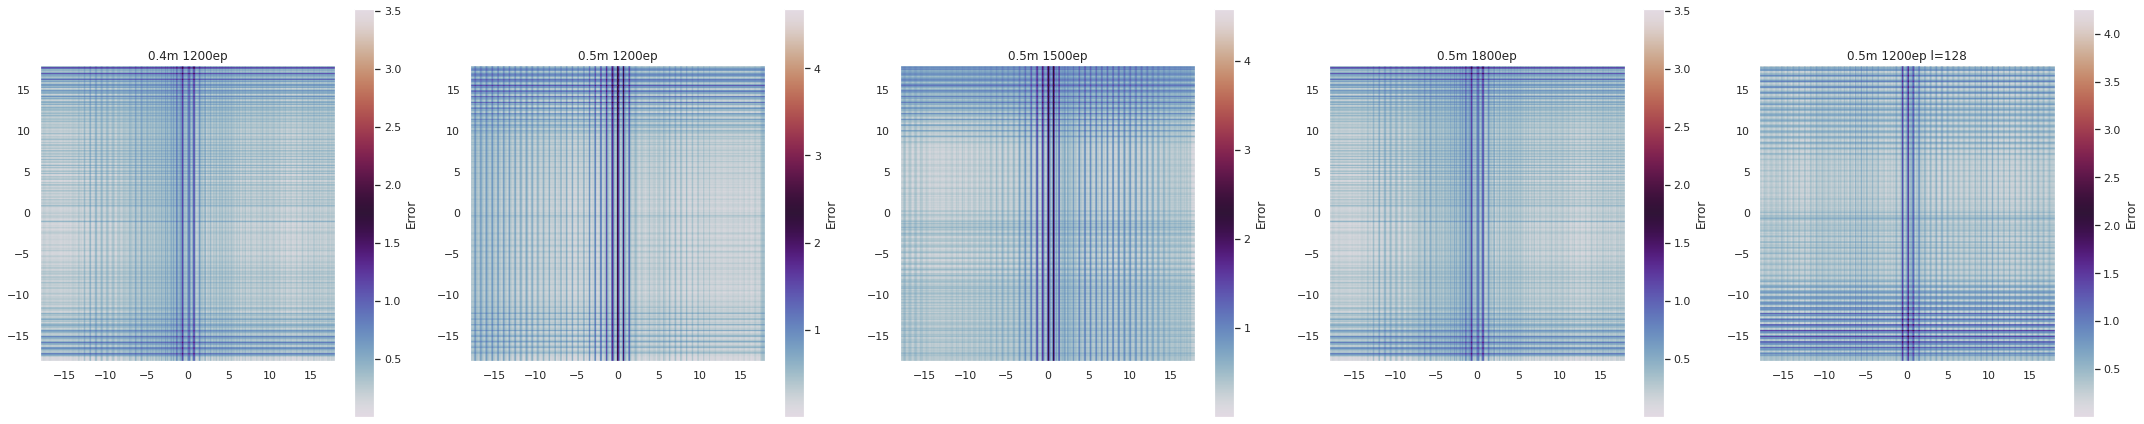

In [14]:
fig, axs = plt.subplots(1, 5, figsize=(30, 6))
cuadrado=[-18, 18, -18, 18]
map='twilight'
interpol='gaussian'#'bessel'

ax = axs[0]
hb = ax.imshow(Error1, extent=cuadrado,  cmap=map, interpolation=interpol)
ax.set_title("0.4m 1200ep")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Error')
ax.grid(False)


ax = axs[1]
hb = ax.imshow(Error2, extent=cuadrado,  cmap=map, interpolation=interpol)
ax.set_title("0.5m 1200ep")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Error')
ax.grid(False)

ax = axs[2]
hb = ax.imshow(Error3, extent=cuadrado,  cmap=map, interpolation=interpol)
ax.set_title("0.5m 1500ep")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Error')
ax.grid(False)

ax = axs[3]
hb = ax.imshow(Error1, extent=cuadrado,  cmap=map, interpolation=interpol)
ax.set_title("0.5m 1800ep")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Error')
ax.grid(False)

ax = axs[4]
hb = ax.imshow(Error5, extent=cuadrado,  cmap=map, interpolation=interpol)
ax.set_title("0.5m 1200ep l=128")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Error')
ax.grid(False)

fig.tight_layout()
plt.show()

In [15]:
Error1_plano=Error1.flatten()
Error2_plano=Error2.flatten()
Error3_plano=Error3.flatten()
Error4_plano=Error4.flatten()
Error5_plano=Error5.flatten()


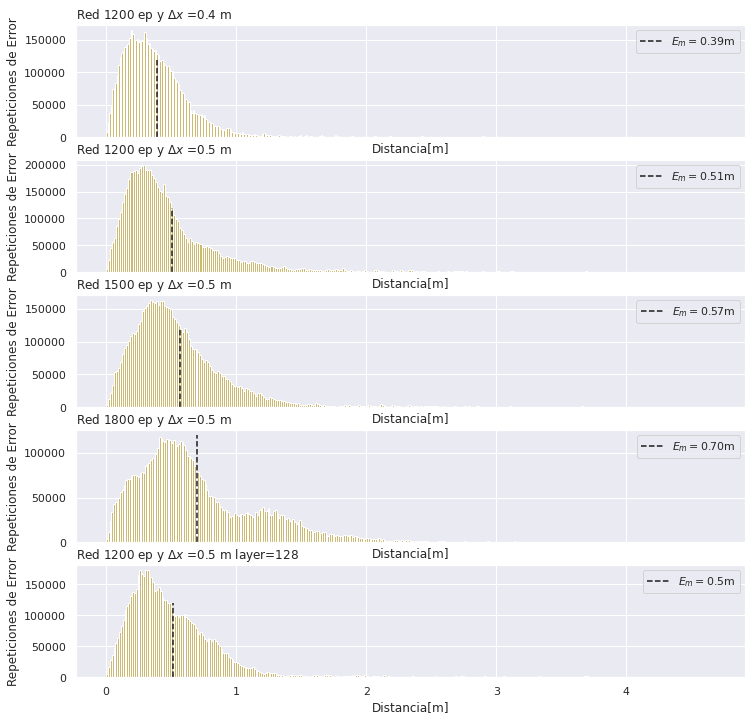

In [16]:
fig, axs = plt.subplots(5, 1,sharex=True, figsize=(12, 12))
bins=300

axs[0].hist(Error1_plano, bins=bins, color='y')
axs[0].vlines(error_medio1, 0,2* 60000, linestyles='dashed')
#axs[0].set_xlabel('1200 0.4')
axs[0].set_ylabel('Repeticiones de Error')
axs[0].set_title('Red 1200 ep y $\Delta x$ =0.4 m', loc='left')
axs[0].grid(True)
axs[0].set_xlabel('Distancia[m]')
axs[0].legend(['$E_m = 0.39$m'])

axs[1].hist(Error2_plano, bins=bins, color='y')
axs[1].vlines(error_medio2, 0, 2*60000,linestyles='dashed')
#axs[1].set_xlabel('1200 0.5')
axs[1].set_ylabel('Repeticiones de Error')
axs[1].set_title('Red 1200 ep y $\Delta x$ =0.5 m', loc='left')
axs[1].grid(True)
axs[1].set_xlabel('Distancia[m]')
axs[1].legend(['$E_m = 0.51$m'])

axs[2].hist(Error3_plano, bins=bins, color='y')
axs[2].vlines(error_medio3, 0, 2*60000,linestyles='dashed')
#axs[2].set_xlabel('1500 0.5')
axs[2].set_ylabel('Repeticiones de Error')
axs[2].set_title('Red 1500 ep y $\Delta x$ =0.5 m', loc='left')
axs[2].set_xlabel('Distancia[m]')
axs[2].grid(True)
axs[2].legend(['$E_m = 0.57$m'])

axs[3].hist(Error4_plano, bins=bins, color='y')
axs[3].vlines(error_medio4, 0, 2*60000,linestyles='dashed')
axs[3].set_xlabel('Distancia[m]')
axs[3].set_ylabel('Repeticiones de Error')
axs[3].set_title('Red 1800 ep y $\Delta x$ =0.5 m', loc='left')
axs[3].grid(True)
axs[3].legend(['$E_m = 0.70$m'])

axs[4].hist(Error5_plano, bins=bins, color='y')
axs[4].vlines(error_medio5, 0, 2*60000,linestyles='dashed')
axs[4].set_xlabel('Distancia[m]')
axs[4].set_ylabel('Repeticiones de Error')
axs[4].set_title('Red 1200 ep y $\Delta x$ =0.5 m layer=128', loc='left')
axs[4].grid(True)
axs[4].legend(['$E_m=0.5$m'])

#fig.tight_layout()
plt.show()

     |████████████████████████████████| 55 kB 4.0 MB/s 
  Created wheel for fitter: filename=fitter-1.3.0-py3-none-any.whl size=24761 sha256=d63e4719237385b579ea0c9943e21ae954b8de2ceb2455e92bbf360f5bd3e0c6
  Stored in directory: /root/.cache/pip/wheels/b3/fb/07/86487066f9376e93b115a54f6f8299d7609fc623ef912a6f5a
  Created wheel for easydev: filename=easydev-0.11.1-py3-none-any.whl size=64268 sha256=b8f45993fa6b83aafbec8de7ae4d40afdfa49f2fd29a4137950e432178e73abd
  Stored in directory: /root/.cache/pip/wheels/56/fc/6d/9d9b5562f4fc029cbe483d577d3110d274a82116fee348af10
Successfully built fitter easydev


,sumsquare_error,aic,bic,kl_div
norm,3.962058,3592.295575,-1.005501e+08,inf
cauchy,4.035366,660.100092,-1.004219e+08,inf
expon,10.992036,710.020407,-9.341665e+07,inf
uniform,30.195653,255.397904,-8.635232e+07,inf
chi2,inf,inf,inf,inf


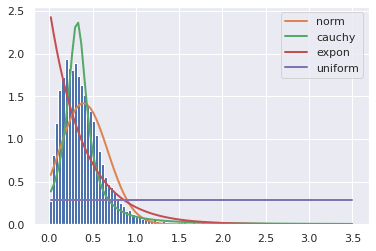

In [18]:
!pip install fitter
#Veamos entre distribuciones basicas a cual ajusta
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(Error1_plano, distributions= get_common_distributions())
f.fit()
f.summary()


,sumsquare_error,aic,bic,kl_div
norm,5.963523,2850.427440,-9.769155e+07,inf
expon,6.236631,818.533022,-9.737852e+07,inf
uniform,18.922470,319.359236,-8.961943e+07,inf
chi2,inf,inf,inf,inf
cauchy,inf,inf,inf,inf


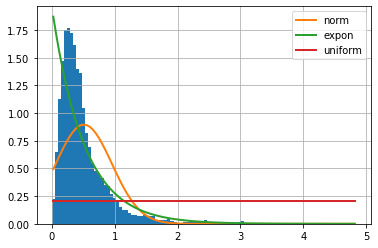

In [ ]:
g = Fitter(Error2_plano, distributions= get_common_distributions())
g.fit()
g.summary()


,sumsquare_error,aic,bic,kl_div
norm,2.834378,2833.711099,-1.028915e+08,inf
expon,7.172824,691.311954,-9.640080e+07,inf
uniform,16.894617,306.306095,-9.041187e+07,inf
cauchy,inf,inf,inf,inf
chi2,inf,inf,inf,inf


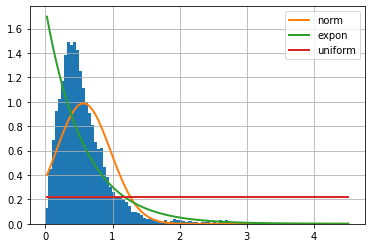

In [ ]:

h = Fitter(Error3_plano, distributions= get_common_distributions())
h.fit()
h.summary()



,sumsquare_error,aic,bic,kl_div
norm,2.691071,1450.075845,-1.032542e+08,inf
expon,5.269014,511.922806,-9.855713e+07,inf
uniform,12.515495,283.963744,-9.250928e+07,inf
cauchy,inf,inf,inf,inf
chi2,inf,inf,inf,inf


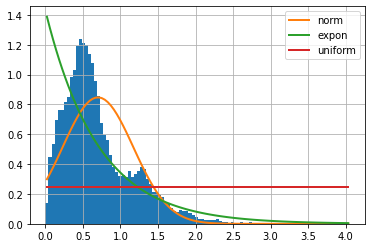

In [ ]:
i = Fitter(Error4_plano, distributions= get_common_distributions())
i.fit()
i.summary()

,sumsquare_error,aic,bic,kl_div
norm,3.197618,3005.098873,-1.020486e+08,0.101184
expon,8.055016,702.401655,-9.558990e+07,0.284474
uniform,19.768810,293.706696,-8.931355e+07,3.159134
chi2,inf,inf,inf,inf
cauchy,inf,inf,inf,inf


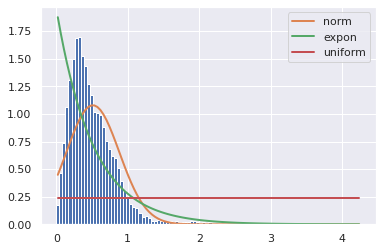

In [19]:
j = Fitter(Error5_plano, distributions= get_common_distributions())
j.fit()
j.summary()

In [20]:
# n=j+i*N ------> posiciones en el vector plano
import random
#veamos si funciona
N=len(Error1)
i=random.randint(0, N)
j=random.randint(0, N)
Error1[i,j]==Error1_plano[j+i*N]

True

In [21]:
posiciones=np.where(Error1_plano > 1)
len(posiciones[0])

218093

In [23]:
posiciones[0]

array([   1222,    1223,    1224, ..., 6989471, 6989473, 6989520])